In [3]:
from mlxtend.data import loadlocal_mnist
from keras.utils.np_utils import to_categorical
import numpy as np
import time
import random
import matplotlib.pyplot as plt
random.seed(3)
np.random.seed(3)

In [6]:
X_train, y_train = loadlocal_mnist(images_path='./mnistdata/train-images.idx3-ubyte', labels_path='./mnistdata/train-labels.idx1-ubyte')
X_test, y_test = loadlocal_mnist(images_path='./mnistdata/t10k-images.idx3-ubyte', labels_path='./mnistdata/t10k-labels.idx1-ubyte')

In [3]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
print(len(X_train[0]))
# print(y_train)

784


In [4]:
X_test_small = X_test[0:5000]
X_train_small = X_train[0:1000]
y_test_small = y_test[0:5000]
y_train_small = y_train[0:1000]

In [5]:
class NeuralNetwork():
    def __init__(self, sizes, epochs, learning_rate):
        self.sizes = sizes
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.layers = len(self.sizes)
        self.params = self.initialization()
        self.errors = []
    
    def sigmoid(self, x, gradient=False):
        if gradient:
            return self.sigmoid(x)*(1-self.sigmoid(x))
        return 1/(1 + np.exp(-x))

    def initialization(self):
        # Make weight vectors of the right shapes based on layer sizes. Initialize with scaled random numbers
        params = {}
        layers = self.layers
        for i in range(1,layers):
            # He-et-al initialisation
            params['W'+str(i)] = np.random.randn(self.sizes[i-1],self.sizes[i])*np.sqrt(2. / self.sizes[i-1])
            # print(params['W'+str(i)].shape)
        return params

    def cnn_layer(self, x_train):
        return
    def forward_prop(self, x_train):
        params = self.params
        layers = self.layers
        #Take input as A0 layer
        params['A0'] = x_train
        for i in range(1,layers):
            params['A'+str(i)] = self.sigmoid(np.dot(params['A'+str(i-1)],params['W'+str(i)]))

        return params['A'+str(layers-1)]

    def backward_prop(self, y_train, output):
        params = self.params
        layers = self.layers

        params['e'+str(layers-1)] = output - y_train
        params['d'+str(layers-1)] = params['e'+str(layers-1)] * self.sigmoid(params['A'+str(layers-1)],gradient=True)

        for i in reversed(range(1,layers-1)):
            params['e'+str(i)] = params['d'+str(i+1)].dot(params['W'+str(i+1)].T)
            params['d'+str(i)] = params['e'+str(i)]*self.sigmoid(params['A'+str(i)],gradient=True)

    
    def gradient_descent(self):
        # Update weights in all layers using gradient descent
        params = self.params
        layers = self.layers

        for i in range(1,layers):
            params['W'+str(i)] -= self.learning_rate * (params['A'+str(i-1)].T.dot(params['d'+str(i)]))
    
    def accuracy(self, x_val, y_val):
        count = 0
        output = self.forward_prop(x_val)
        for i in range(len(x_val)):
            pred = np.argmax(output[i])
            if(y_val[i][pred]==1):
                count = count+1  
        return count

    def train(self, x_train, y_train, x_test, y_test):
        start_time = time.time()
        for iteration in range(self.epochs):

            output = self.forward_prop(x_train)
            self.backward_prop(y_train,output)
            self.gradient_descent()

            # Check accuracy on test data and print a single line per epoch
            acc= self.accuracy(x_test, y_test)/len(y_test)*100
            self.errors.append(100-acc)
            print('Epoch: {0}, Time Spent: {1:.2f}s, Accuracy: {2:.2f}%'.format(
                iteration+1, time.time() - start_time, acc
            ))



In [6]:
#Can create any number of layers
network_shape = [784, 256, 10]
epochs = 100
learning_rate = 0.002

nn = NeuralNetwork(network_shape,epochs,learning_rate)

In [7]:
nn.train(X_train,y_train,X_test,y_test)
# nn.train(X_train_small,y_train_small,X_test_small,y_test_small)

Epoch: 1, Time Spent: 2.79s, Accuracy: 10.10%
Epoch: 2, Time Spent: 6.17s, Accuracy: 9.80%
Epoch: 3, Time Spent: 9.55s, Accuracy: 10.10%
Epoch: 4, Time Spent: 12.81s, Accuracy: 9.74%
Epoch: 5, Time Spent: 16.10s, Accuracy: 10.32%
Epoch: 6, Time Spent: 19.40s, Accuracy: 9.80%
Epoch: 7, Time Spent: 22.79s, Accuracy: 11.35%
Epoch: 8, Time Spent: 26.29s, Accuracy: 9.80%
Epoch: 9, Time Spent: 29.82s, Accuracy: 11.35%
Epoch: 10, Time Spent: 33.31s, Accuracy: 9.82%
Epoch: 11, Time Spent: 36.78s, Accuracy: 10.10%
Epoch: 12, Time Spent: 40.24s, Accuracy: 10.10%
Epoch: 13, Time Spent: 43.63s, Accuracy: 17.31%
Epoch: 14, Time Spent: 47.00s, Accuracy: 9.80%
Epoch: 15, Time Spent: 50.32s, Accuracy: 9.80%
Epoch: 16, Time Spent: 53.82s, Accuracy: 11.72%
Epoch: 17, Time Spent: 57.20s, Accuracy: 10.10%
Epoch: 18, Time Spent: 60.59s, Accuracy: 15.84%
Epoch: 19, Time Spent: 64.01s, Accuracy: 9.80%
Epoch: 20, Time Spent: 67.41s, Accuracy: 23.37%
Epoch: 21, Time Spent: 70.82s, Accuracy: 11.12%
Epoch: 22, T

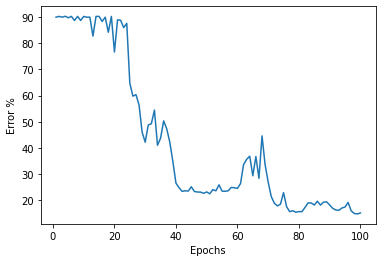

In [8]:
    plt.plot([x for x in range(1,epochs+1)],nn.errors)
    plt.ylabel('Error %')
    plt.xlabel('Epochs')
    plt.show()